<a href="https://colab.research.google.com/github/satyakala-teja/analytics-capstone-satyakala/blob/main/notebooks/04_visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizations for Sales Analysis
This notebook contains charts for trends, category analysis, and regional performance.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/data/sales_data_cleaned.csv')
df.head()


,order_id,order_date,customer_id,category,sub_category,product,quantity,unit_price,sales,region,...,month_name,quarter,order_year,order_month,order_day,order_weekday,is_weekend,category_full,revenue_per_unit,high_value_order
0,1001,2023-01-02,C001,Office Supplies,Binders,Elastic Binder,2,5.0,10.0,East,...,January,1,2023,1,2,0,0,Office Supplies - Binders,5.0,No
1,1002,2023-01-03,C002,Furniture,Chairs,Ergo Chair,1,150.0,150.0,West,...,January,1,2023,1,3,1,0,Furniture - Chairs,150.0,No
2,1003,2023-01-04,C003,Technology,Phones,SmartPhone X,1,700.0,700.0,North,...,January,1,2023,1,4,2,0,Technology - Phones,700.0,Yes
3,1004,2023-01-05,C001,Office Supplies,Paper,Copy Paper,10,3.5,35.0,East,...,January,1,2023,1,5,3,0,Office Supplies - Paper,3.5,No
4,1005,2023-01-06,C004,Technology,Laptops,UltraBook Pro,1,1200.0,1200.0,South,...,January,1,2023,1,6,4,0,Technology - Laptops,1200.0,Yes


## 1. Monthly Sales Trend (Line Chart)
Shows how total revenue varies across months.


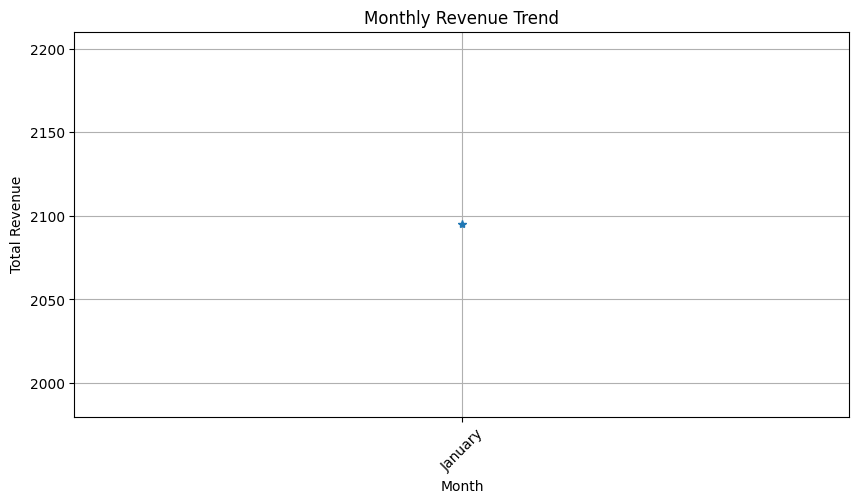

In [11]:
# Prepare monthly trend data
monthly_trend = df.groupby('month_name')['total_revenue'].sum()
monthly_trend

# Plot the line chart
plt.figure(figsize=(10,5))
plt.plot(monthly_trend.index, monthly_trend.values, marker='*')
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## 2. Revenue by Region (Bar Chart)
Shows which regions generate the highest revenue.


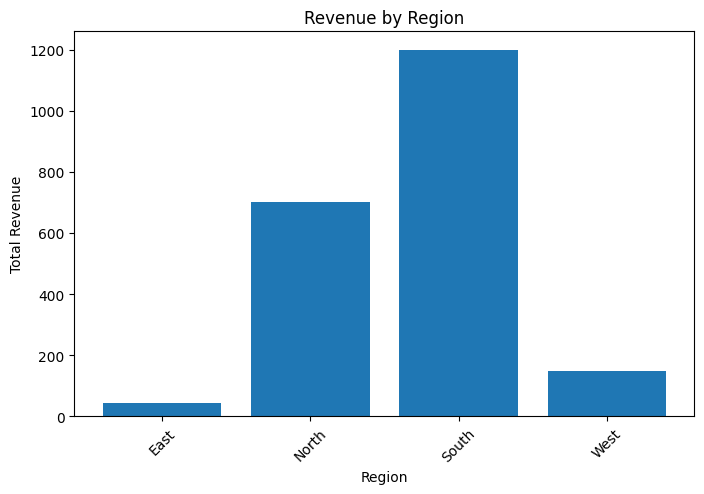

In [6]:
region_trend = df.groupby('region')['total_revenue'].sum()

plt.figure(figsize=(8,5))
plt.bar(region_trend.index, region_trend.values)
plt.title("Revenue by Region")
plt.xlabel("Region")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()


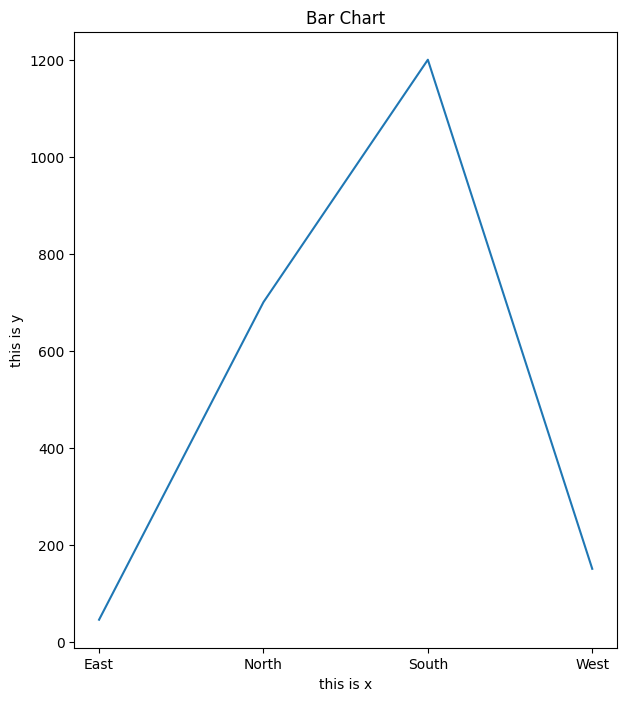

In [10]:
region_trend=df.groupby('region')['total_revenue'].sum()
plt.figure(figsize=(7,8))
plt.plot(region_trend.index,region_trend.values)
plt.title("Bar Chart")
plt.xlabel("this is x")
plt.ylabel("this is y")
plt.show()

## 3. Category-wise Revenue (Bar Chart)
Shows which categories contribute the most to total revenue.


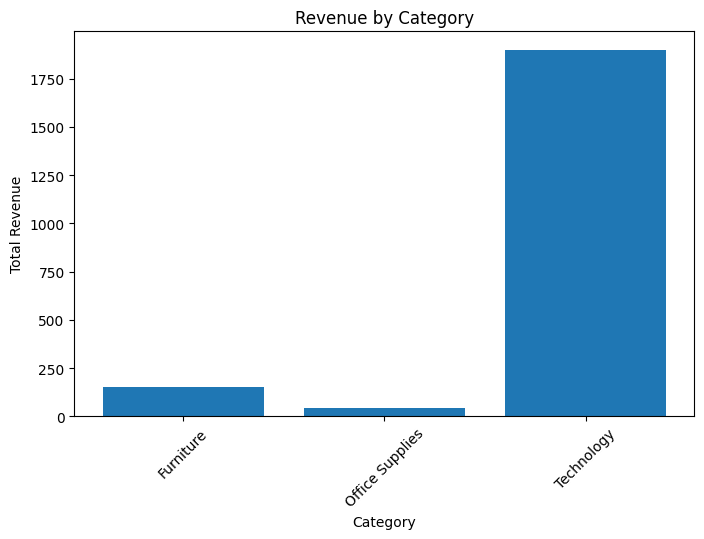

In [12]:
category_trend = df.groupby('category')['total_revenue'].sum()

plt.figure(figsize=(8,5))
plt.bar(category_trend.index, category_trend.values)
plt.title("Revenue by Category")
plt.xlabel("Category")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()


## 4. Top 5 Products by Revenue
Identify which products generate the highest revenue.


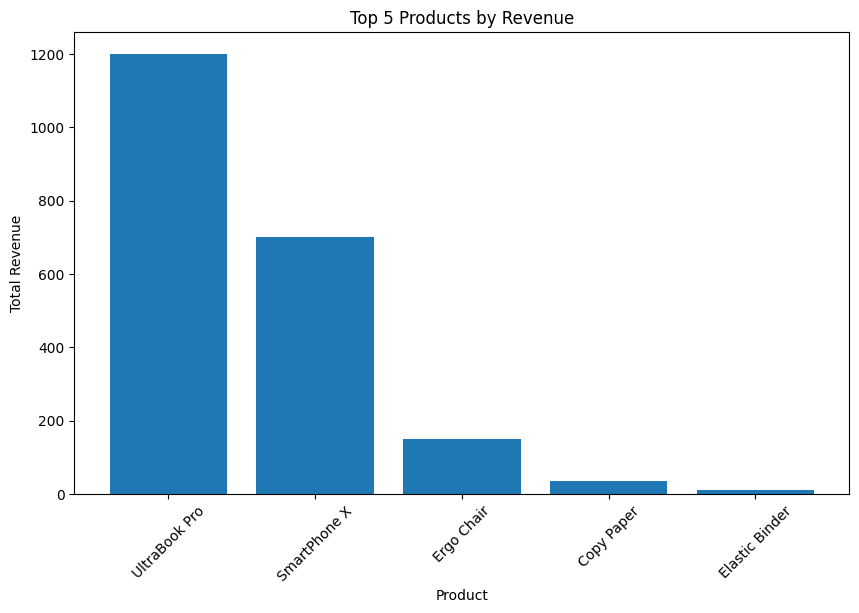

In [13]:
top_products = df.groupby('product')['total_revenue'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(10,6))
plt.bar(top_products.index, top_products.values)
plt.title("Top 5 Products by Revenue")
plt.xlabel("Product")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()


## 5. Region vs Category Revenue (Pivot Table)
Analyze how revenue varies by region and category.


In [15]:
pivot_region_category = df.pivot_table(
    values='total_revenue',
    index='region',
    columns='category',
    aggfunc='sum',
    fill_value=0
)

pivot_region_category


category,Furniture,Office Supplies,Technology
region,,,
East,0.0,45.0,0.0
North,0.0,0.0,700.0
South,0.0,0.0,1200.0
West,150.0,0.0,0.0
